## <center> Assignment 3 </center>

#### Name: Qing Dai
#### Student ID: 235821890


## Question 1

Given the following directed graph with 6 nodes:

- Node 0 → Node 2
- Node 1 → Node 3
- Node 2 → Node 3
- Node 3 → Node 4
- Node 4 → Node 5
- Node 5 → Node 0

Suppose nodes `{0, 1, 2, 3}` are associated with **topic A**, and nodes `{4, 5}` are associated with **topic B**. Implement the topic-sensitive PageRank algorithm (targeting **topic B**) and output the importance scores for nodes `{0, 1, 2, 3, 4, 5}`.

Set the parameter $\alpha = 0.8$. The convergence criterion is that the Manhattan Distance of the output scores is less than $1.0 \times 10^{-3}$.

In [2]:
import networkx as nx

#initialze the nodes according to question description
DG = nx.DiGraph()

DG.add_edge(0,2)
DG.add_edge(1,3)
DG.add_edge(2,3)
DG.add_edge(3,4)
DG.add_edge(4,5)
DG.add_edge(5,0)

assert DG.number_of_edges() == 6
assert list(DG.predecessors(3)) == [1,2]
print(list(DG.edges))

A = nx.adjacency_matrix(DG)
print(A.todense())

#compute the page rank according to the requirement
pr = nx.pagerank(DG, alpha= 0.8, personalization={4:0.5,5:0.5}, tol= 0.001);
print(pr)

[(0, 2), (2, 3), (1, 3), (3, 4), (4, 5), (5, 0)]
[[0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]]
{0: 0.21325158051920093, 2: 0.1709087101499226, 1: 0.0, 3: 0.138571642527309, 4: 0.2099349768181617, 5: 0.2673330899854057}


### Reconfirm is nx.pagerank is the correct algorithm to calculate topic-sensative pagerank
According to [documentation of network on page rank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank), backend implementation is utilizing sparse linear algebra backend - [graphblas](https://github.com/python-graphblas/graphblas-algorithms). As I dig into the implementatino of graphblas, pagerank algorithm in particular, I found the implementation is correct: [link analysis-pagerank](https://github.com/python-graphblas/graphblas-algorithms/blob/main/graphblas_algorithms/algorithms/link_analysis/pagerank_alg.py), in terms of
* personalaizaion is the vector for topic-sensitive setting
``` python
    # Personalization vector or scalar
    if personalization is None:
        p = 1.0 / N
    else:
        ...
        p = (personalization / denom).new(mask=personalization.V, name="p")
    ...
    for _i in range(max_iter):
      ...
      # x << alpha * ((xprev * S) @ A + "dangling_weights") + (1 - alpha) * p 
```
* convergence criteria is Manhattan Distance of the output scores 
``` python
    def is_converged(xprev, x, tol):
        """Check convergence, L1 norm: err = sum(abs(xprev - x)); err < N * tol
```


## Question 2

After implementing the topic-sensitive PageRank algorithm in Question 1, your task now is to visualize the graph and its PageRank scores.

### Objectives:
- Visualize the directed graph created in Question 1. You may use the NetworkX package for visualization.
- Normalize the PageRank scores to the range [0, 1] using min-max normalization.
- Map the normalized PageRank scores to a sequential color scale for node visualization. Nodes with higher importance (higher scores) should be filled with darker colors.


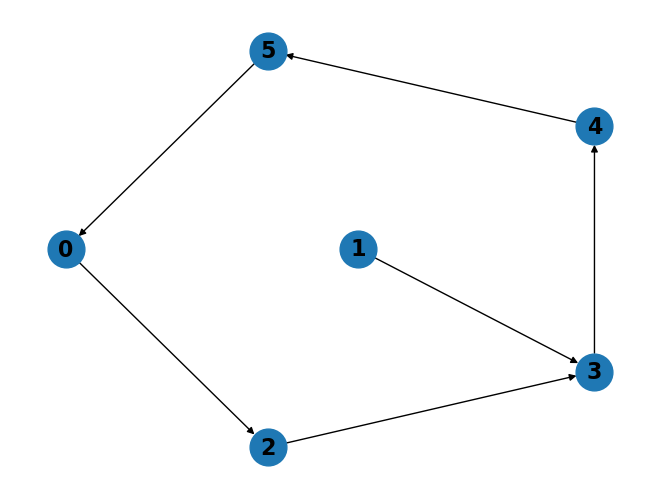

In [47]:
#visualzie directed graph in Question 1
import matplotlib.pyplot as plt

plt.figure(0.5)

shells = [[1], [0,2,3,4,5]]
nx.draw(DG, pos=nx.shell_layout(DG, shells), with_labels = True, node_size=700, font_size = 16, font_weight = 'bold',)
plt.show()


[0.79769991 0.63930997 0.         0.51834826 0.78529365 1.        ]


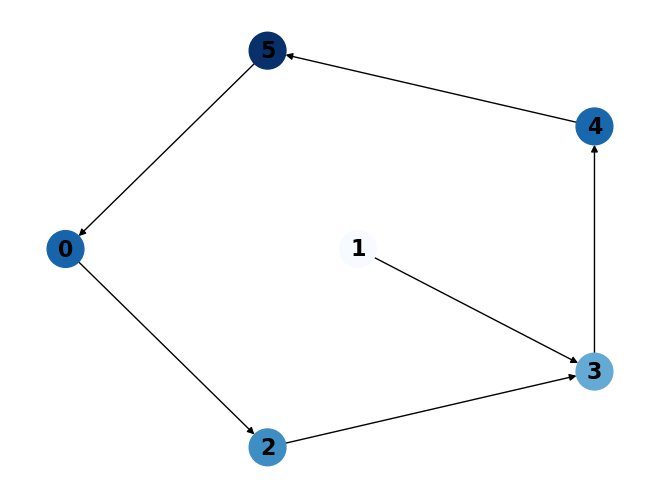

In [48]:
import numpy as np
# Normalize the Pagerank scores
scores = np.array(list(pr.values()))

norm_scores = (scores - min(scores))/(max(scores) - min(scores))
print(norm_scores)

# Map the normalized PageRank scores to a sequential color scale for node visualization.
nx.draw(DG, pos=nx.shell_layout(DG, shells), with_labels = True, node_size=700, font_size = 16, font_weight = 'bold', cmap = plt.cm.Blues, node_color = norm_scores)

